In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
raw_churn_cols = ['CUSTOMER_ID', 'GENDER', 'SENIOR_CITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONE_SERVICE', 'MULTIPLE_LINES', 'INTERNET_SERVICE',
       'ONLINE_SECURITY', 'ONLINE_BACKUP', 'DEVICE_PROTECTION', 'TECH_SUPPORT',
       'STREAMING_TV', 'STREAMING_MOVIES', 'CONTACT', 'PAPERLESS_BILLING',
       'PAYMENT_METHOD', 'MONTHLY_CHARGES', 'TOTAL_CHARGES', 'CHURN']

df_raw_churn = pd.read_csv('./data/telco_customer_churn.csv', skiprows = 1,
                          header = None, names = raw_churn_cols, low_memory = False)

In [5]:
df_raw_churn.head()

,CUSTOMER_ID,GENDER,SENIOR_CITIZEN,PARTNER,DEPENDENTS,TENURE,PHONE_SERVICE,MULTIPLE_LINES,INTERNET_SERVICE,ONLINE_SECURITY,ONLINE_BACKUP,DEVICE_PROTECTION,TECH_SUPPORT,STREAMING_TV,STREAMING_MOVIES,CONTACT,PAPERLESS_BILLING,PAYMENT_METHOD,MONTHLY_CHARGES,TOTAL_CHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_churn = df_raw_churn.copy()

In [7]:
df_churn.shape

(7043, 21)

In [8]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CUSTOMER_ID          7043 non-null object
GENDER               7043 non-null object
SENIOR_CITIZEN       7043 non-null int64
PARTNER              7043 non-null object
DEPENDENTS           7043 non-null object
TENURE               7043 non-null int64
PHONE_SERVICE        7043 non-null object
MULTIPLE_LINES       7043 non-null object
INTERNET_SERVICE     7043 non-null object
ONLINE_SECURITY      7043 non-null object
ONLINE_BACKUP        7043 non-null object
DEVICE_PROTECTION    7043 non-null object
TECH_SUPPORT         7043 non-null object
STREAMING_TV         7043 non-null object
STREAMING_MOVIES     7043 non-null object
CONTACT              7043 non-null object
PAPERLESS_BILLING    7043 non-null object
PAYMENT_METHOD       7043 non-null object
MONTHLY_CHARGES      7043 non-null float64
TOTAL_CHARGES        7043 non-null object
CHURN                7043 non-null object
dtypes: floa

In [9]:
df_churn.columns

Index(['CUSTOMER_ID', 'GENDER', 'SENIOR_CITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONE_SERVICE', 'MULTIPLE_LINES', 'INTERNET_SERVICE',
       'ONLINE_SECURITY', 'ONLINE_BACKUP', 'DEVICE_PROTECTION', 'TECH_SUPPORT',
       'STREAMING_TV', 'STREAMING_MOVIES', 'CONTACT', 'PAPERLESS_BILLING',
       'PAYMENT_METHOD', 'MONTHLY_CHARGES', 'TOTAL_CHARGES', 'CHURN'],
      dtype='object')

In [10]:
df_churn.describe()

,SENIOR_CITIZEN,TENURE,MONTHLY_CHARGES
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Transform

In [11]:
df_churn = df_churn[['CUSTOMER_ID', 'SENIOR_CITIZEN', 'GENDER', 'TENURE', 'MONTHLY_CHARGES','CHURN']]

In [12]:
df_churn.head()

,CUSTOMER_ID,SENIOR_CITIZEN,GENDER,TENURE,MONTHLY_CHARGES,CHURN
0,7590-VHVEG,0,Female,1,29.85,No
1,5575-GNVDE,0,Male,34,56.95,No
2,3668-QPYBK,0,Male,2,53.85,Yes
3,7795-CFOCW,0,Male,45,42.30,No
4,9237-HQITU,0,Female,2,70.70,Yes


In [13]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
CUSTOMER_ID        7043 non-null object
SENIOR_CITIZEN     7043 non-null int64
GENDER             7043 non-null object
TENURE             7043 non-null int64
MONTHLY_CHARGES    7043 non-null float64
CHURN              7043 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 330.2+ KB


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta

In [15]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [16]:
df = df_churn.copy()

In [17]:
df.shape

(7043, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
CUSTOMER_ID        7043 non-null object
SENIOR_CITIZEN     7043 non-null int64
GENDER             7043 non-null object
TENURE             7043 non-null int64
MONTHLY_CHARGES    7043 non-null float64
CHURN              7043 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 330.2+ KB


In [19]:
df.columns

Index(['CUSTOMER_ID', 'SENIOR_CITIZEN', 'GENDER', 'TENURE', 'MONTHLY_CHARGES',
       'CHURN'],
      dtype='object')

In [20]:
df.describe()

,SENIOR_CITIZEN,TENURE,MONTHLY_CHARGES
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Univariant analysis

In [21]:
df.CUSTOMER_ID.head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: CUSTOMER_ID, dtype: object

In [22]:
df.CUSTOMER_ID.isna().sum()

0

In [23]:
len(df.CUSTOMER_ID.unique())

7043

In [24]:
df.TENURE.head()

0     1
1    34
2     2
3    45
4     2
Name: TENURE, dtype: int64

In [25]:
df.TENURE.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TENURE, dtype: float64

In [26]:
df.TENURE.isna().sum()

0

In [27]:
len(df.TENURE.unique())

73

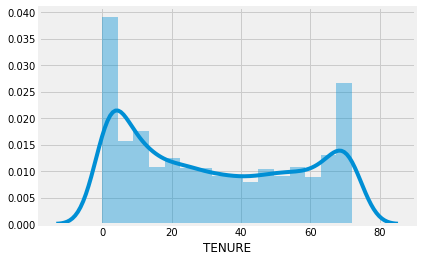

In [28]:
sns.distplot(df.TENURE, axlabel = 'TENURE')

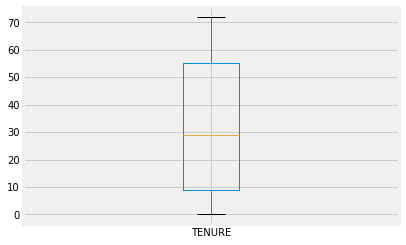

In [29]:
df.boxplot(column='TENURE', return_type='axes')

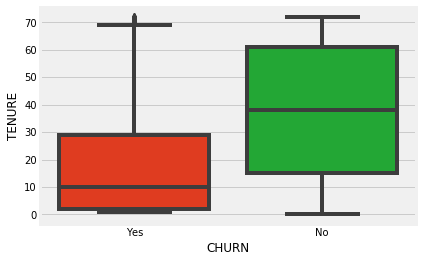

In [30]:
status_order = ['Yes','No']
status_palette = ['#ff2600', "#0dbd25"]

color_reg = "#0dbd25"
color_churn = '#ff2600'

sns.boxplot(x = 'CHURN', y = 'TENURE', data = df, order=status_order, palette = status_palette)

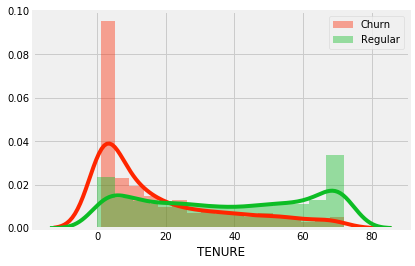

In [33]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.TENURE, label = 'Churn', color = color_churn)
sns.distplot(df_reg.TENURE, label='Regular', color=color_reg)
plt.legend(labels=['Churn', 'Regular'])
plt.show()

In [34]:
df.MONTHLY_CHARGES.head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MONTHLY_CHARGES, dtype: float64

In [35]:
df.MONTHLY_CHARGES.isna().sum()

0

In [36]:
df.MONTHLY_CHARGES.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MONTHLY_CHARGES, dtype: float64

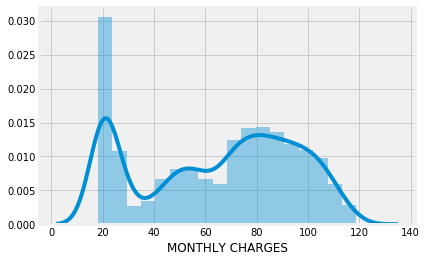

In [37]:
sns.distplot(df.MONTHLY_CHARGES, axlabel = 'MONTHLY CHARGES')

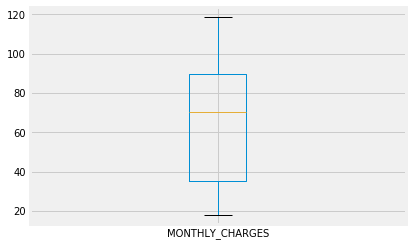

In [38]:
df.boxplot(column = 'MONTHLY_CHARGES', return_type = 'axes')

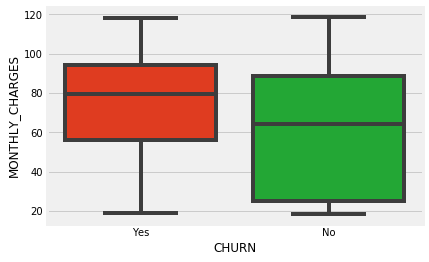

In [39]:
status_order = ['Yes','No']
status_palette = ["#ff2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#ff2600"

sns.boxplot(x='CHURN', y='MONTHLY_CHARGES', data=df, order=status_order, palette = status_palette)
plt.show()

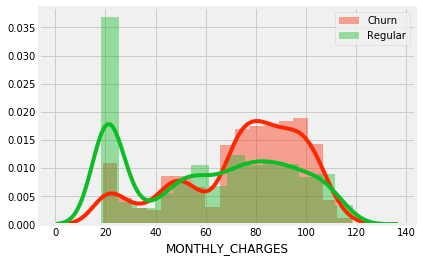

In [40]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.MONTHLY_CHARGES, label='Churn', color=color_churn)
sns.distplot(df_reg.MONTHLY_CHARGES, label='Regular', color=color_reg)
plt.legend(labels=['Churn','Regular'])
plt.show()

## CHURN

In [41]:
df.CHURN.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: CHURN, dtype: object

In [42]:
df.CHURN.describe(include = ['objects'])

count     7043
unique       2
top         No
freq      5174
Name: CHURN, dtype: object

In [43]:
df.CHURN.value_counts().sort_index()

No     5174
Yes    1869
Name: CHURN, dtype: int64

In [44]:
df.CHURN.isna().sum()

0

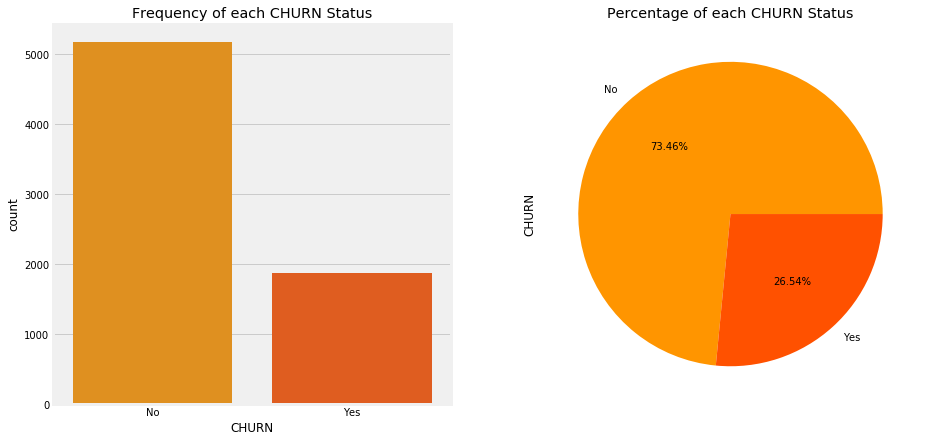

In [45]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

churn_palette = ['#ff9500','#ff5100']
sns.countplot(x='CHURN',data=df,ax=axs[0],palette=churn_palette)
axs[0].set_title("Frequency of each CHURN Status")

df.CHURN.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%', colors = churn_palette)
axs[1].set_title("Percentage of each CHURN Status")

plt.show()

In [46]:
churn_map = {'Yes':1, 'No':0}
df["CHURN_STATUS"] = df['CHURN'].map(churn_map)

In [47]:
df.head()

,CUSTOMER_ID,SENIOR_CITIZEN,GENDER,TENURE,MONTHLY_CHARGES,CHURN,CHURN_STATUS
0,7590-VHVEG,0,Female,1,29.85,No,0
1,5575-GNVDE,0,Male,34,56.95,No,0
2,3668-QPYBK,0,Male,2,53.85,Yes,1
3,7795-CFOCW,0,Male,45,42.30,No,0
4,9237-HQITU,0,Female,2,70.70,Yes,1


## Gender

In [48]:
df.GENDER.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: GENDER, dtype: object

In [49]:
df.GENDER.dtype

dtype('O')

In [50]:
df.GENDER.describe(include = ['obeject'])

count     7043
unique       2
top       Male
freq      3555
Name: GENDER, dtype: object